In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

#grid search is used to find the optimal paramters for each model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Voting Classifier is used to make the prediction by majority vote
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
test = pd.read_csv("C:/Users/Chum Chum/Desktop/Project Mantra/test.csv")
train = pd.read_csv("C:/Users/Chum Chum/Desktop/Project Mantra/train.csv")

In [3]:
#Displaying few rows of the dataset
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#Displaying few rows of the dataset
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

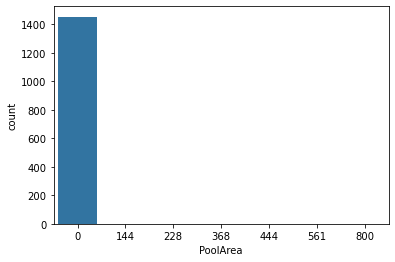

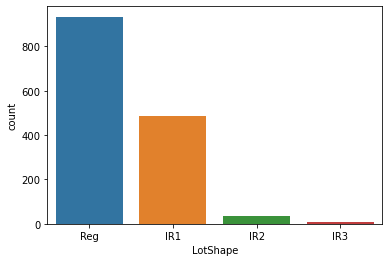

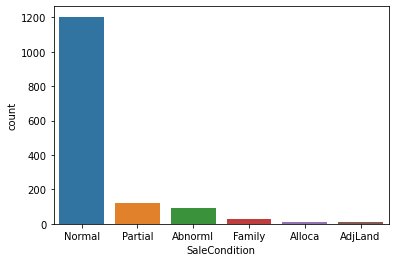

In [6]:
#Plotting a graph based on the PoolArea Column
sns.countplot(x='PoolArea', data=test)
plt.show()

#Plotting a graph based on the LotShape Column
sns.countplot(x='LotShape', data=test)
plt.show()

#Plotting a graph based on the SaleCondition Column
sns.countplot(x='SaleCondition', data=test)
plt.show()

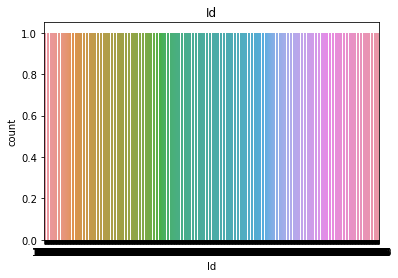

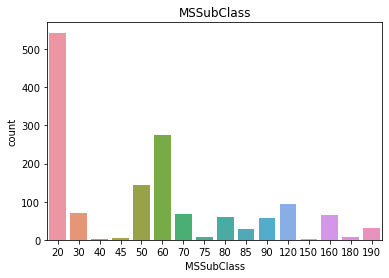

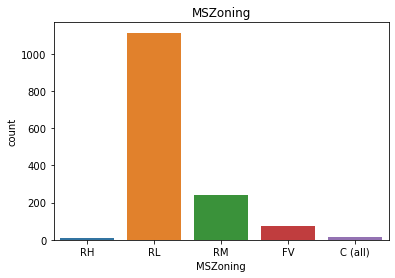

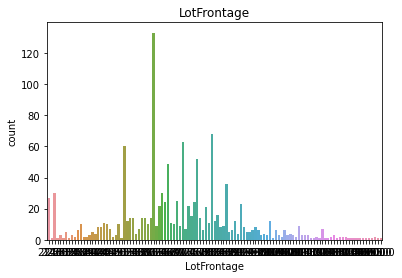

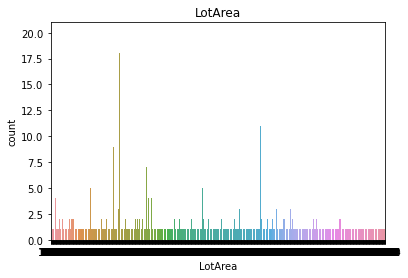

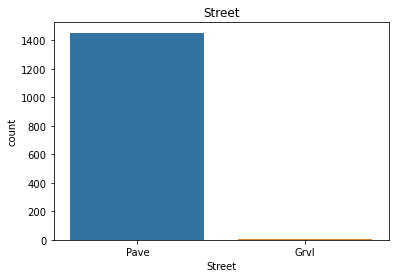

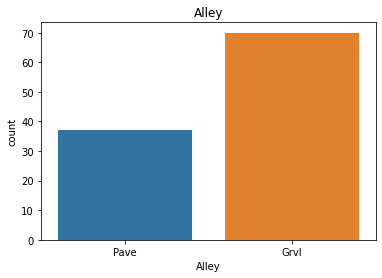

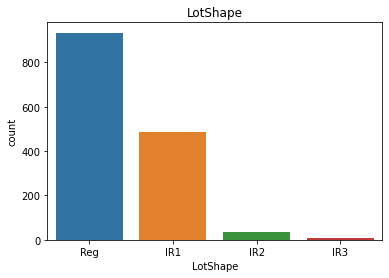

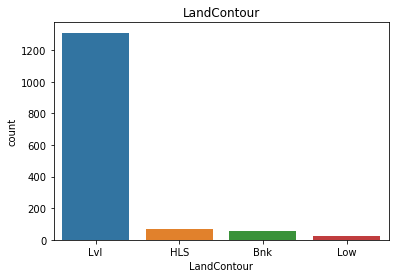

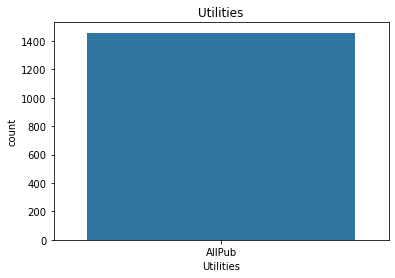

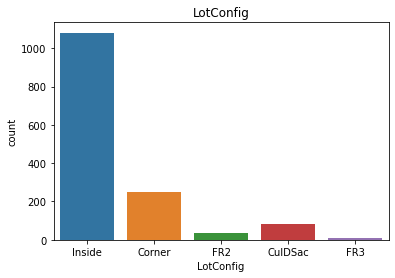

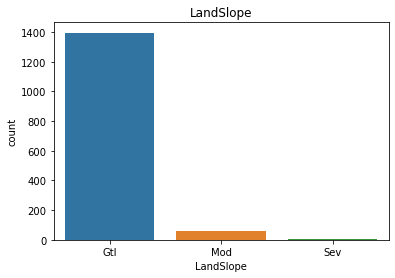

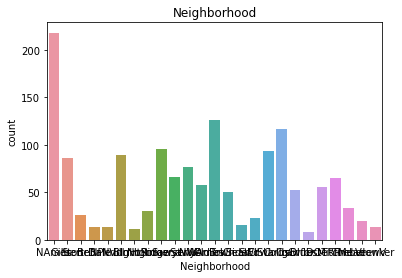

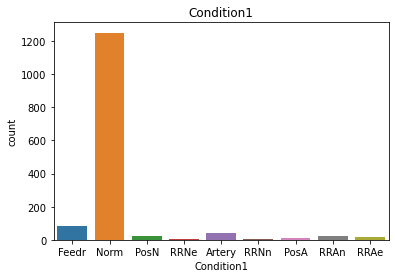

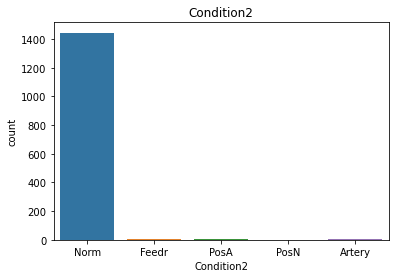

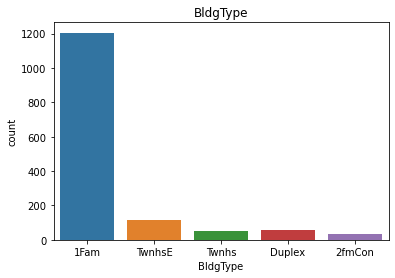

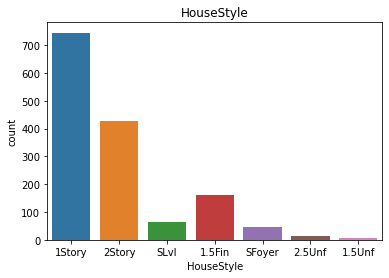

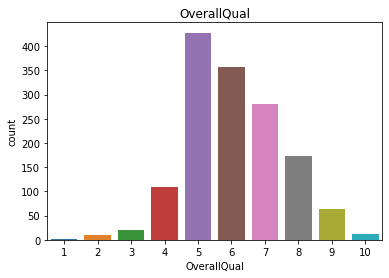

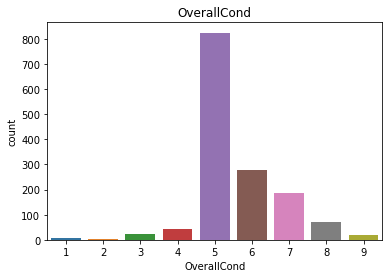

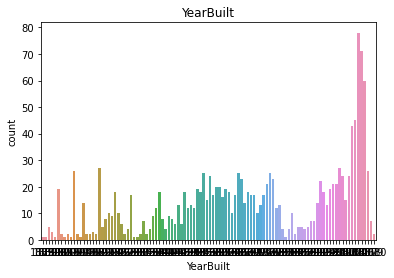

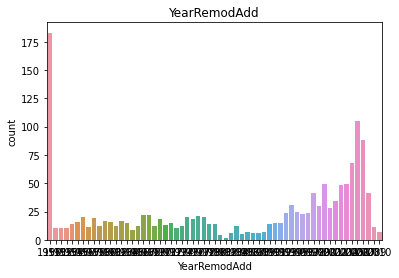

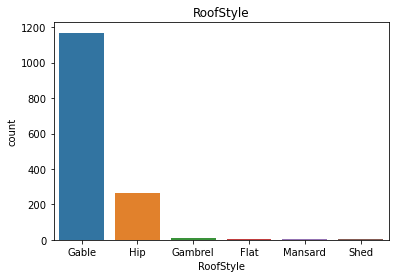

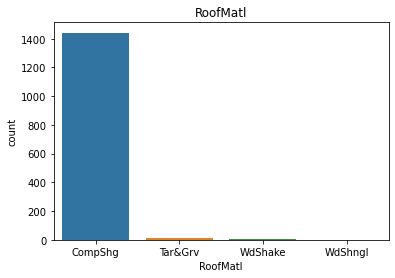

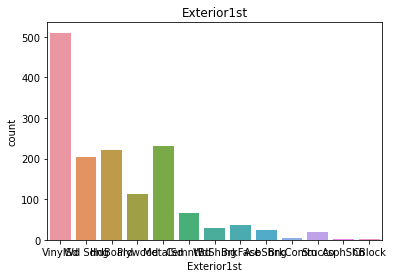

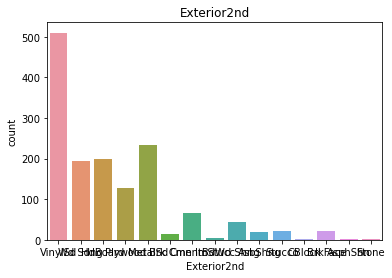

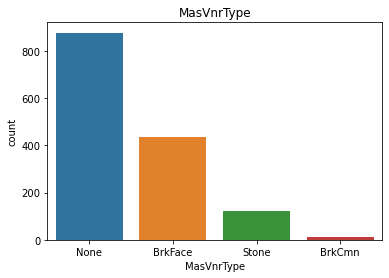

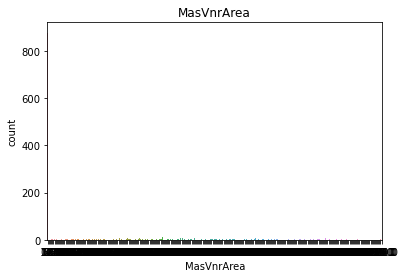

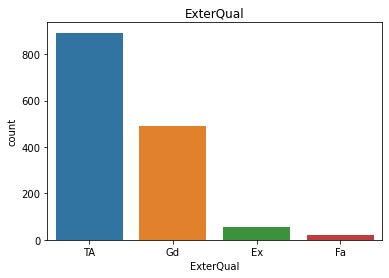

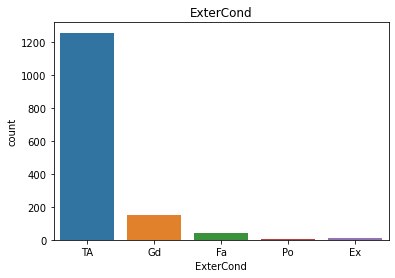

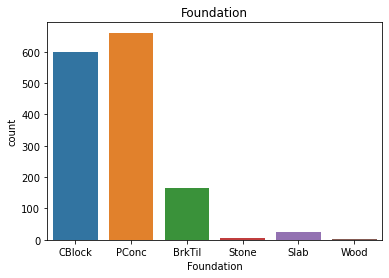

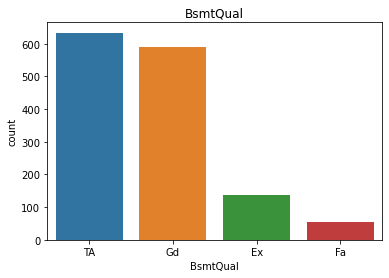

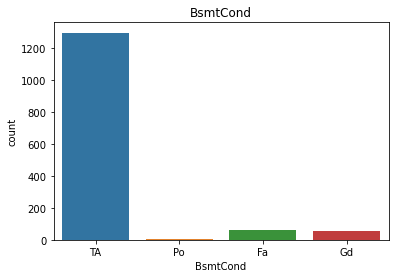

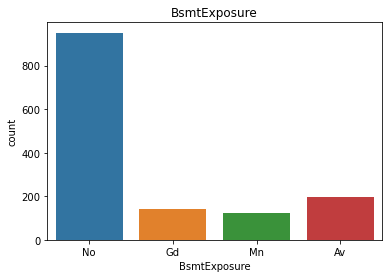

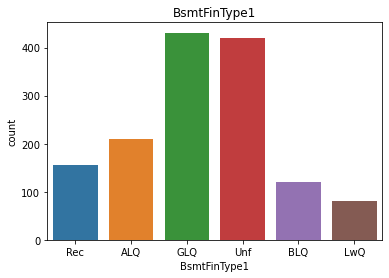

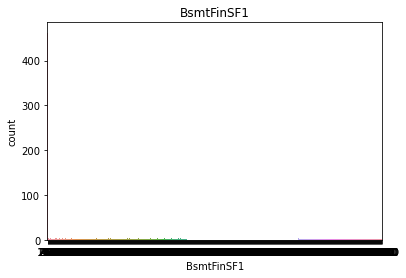

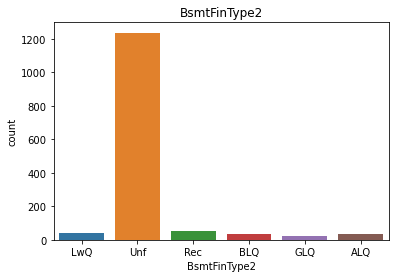

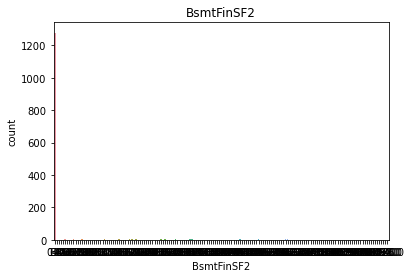

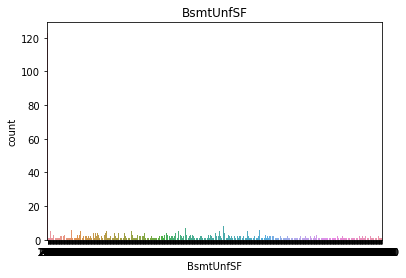

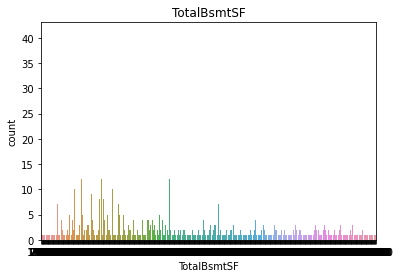

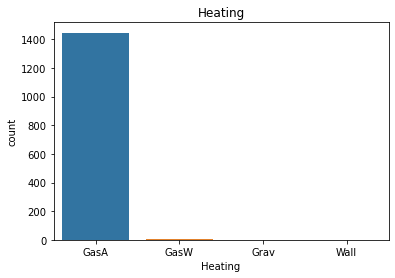

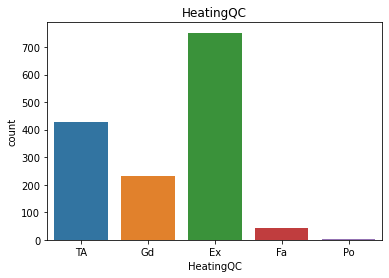

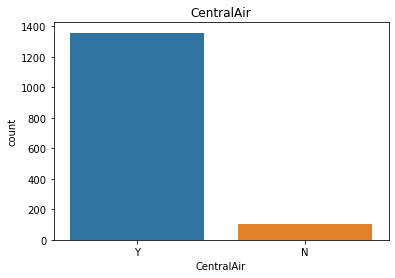

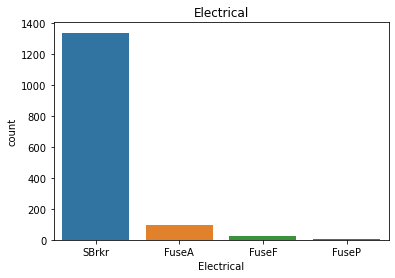

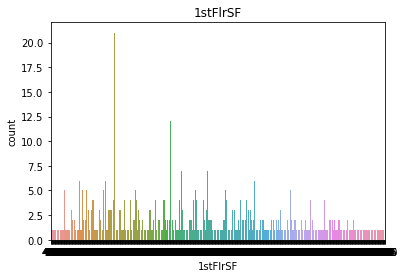

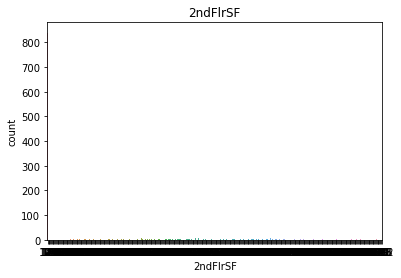

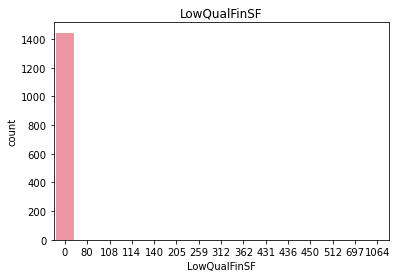

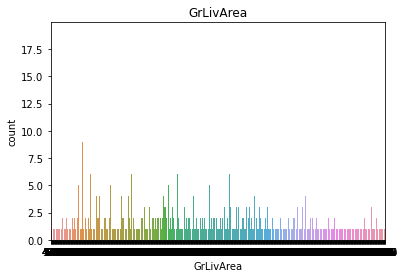

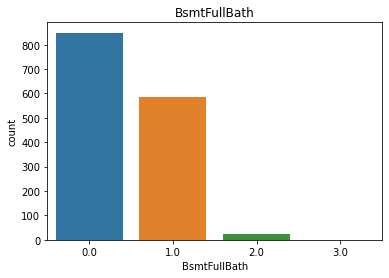

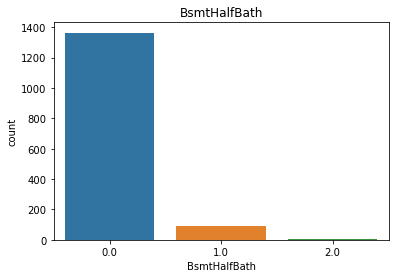

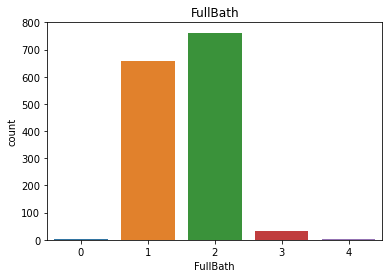

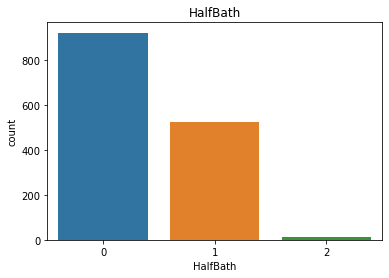

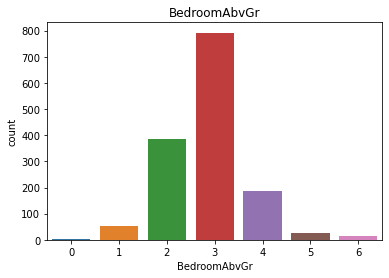

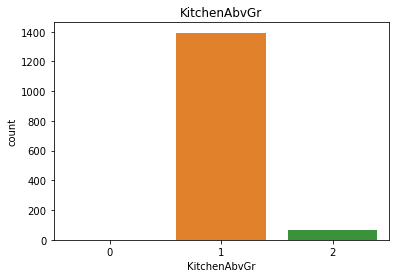

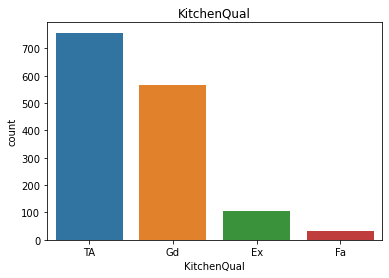

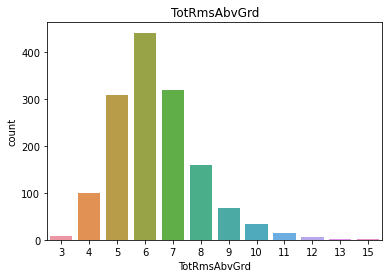

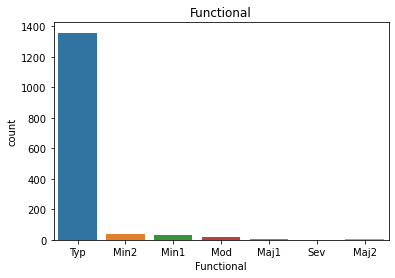

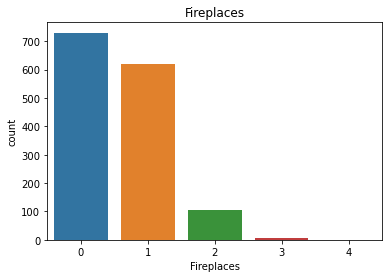

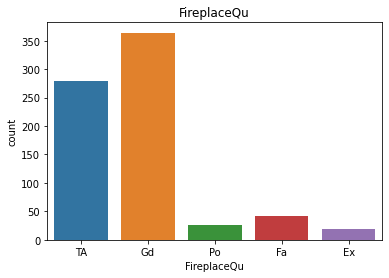

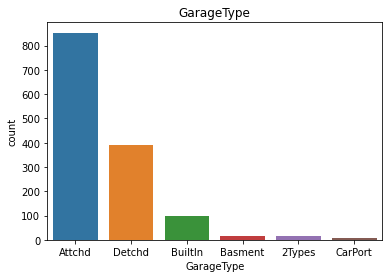

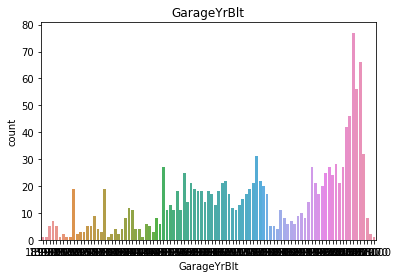

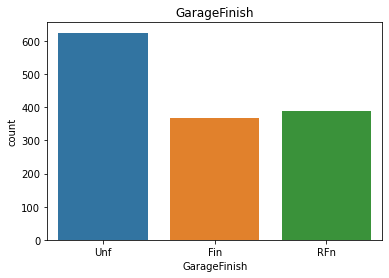

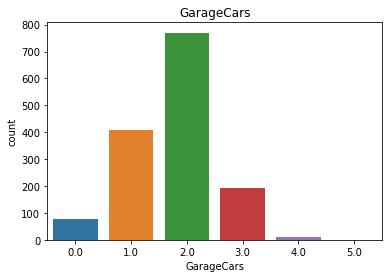

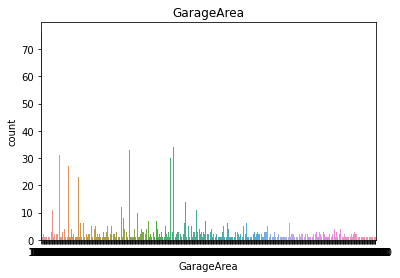

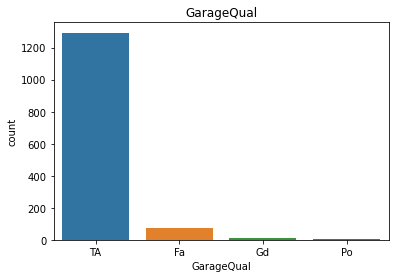

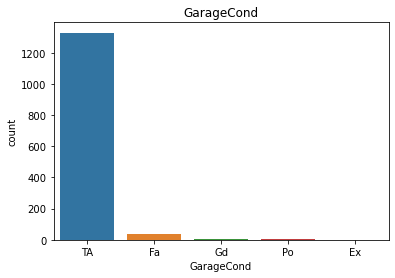

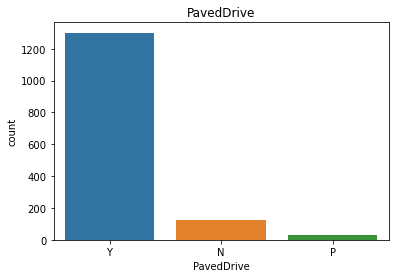

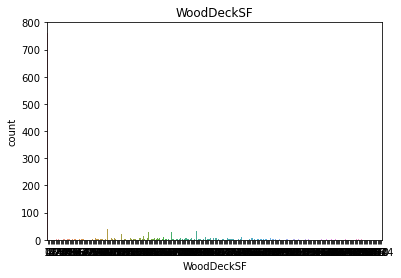

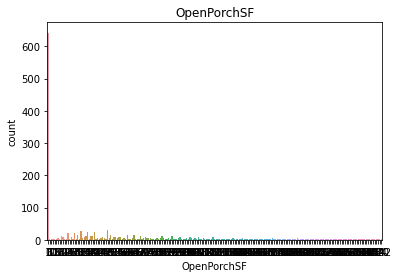

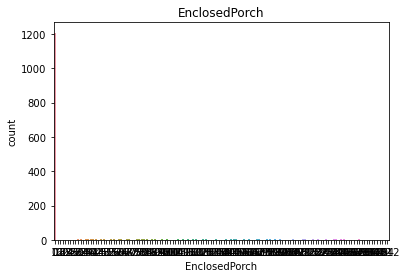

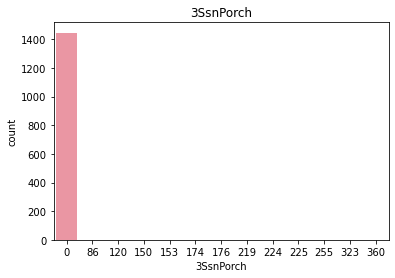

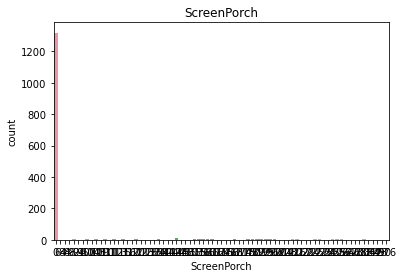

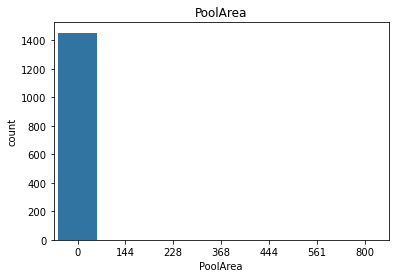

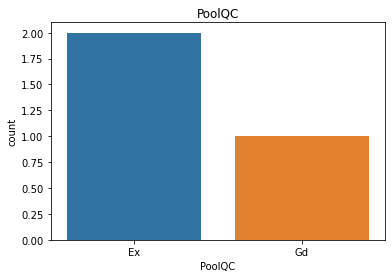

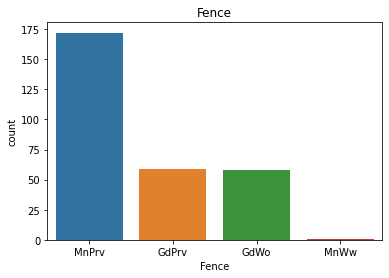

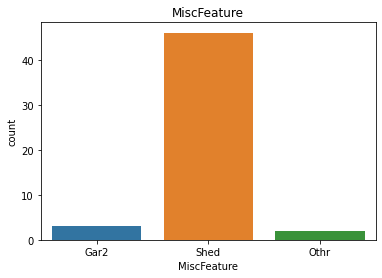

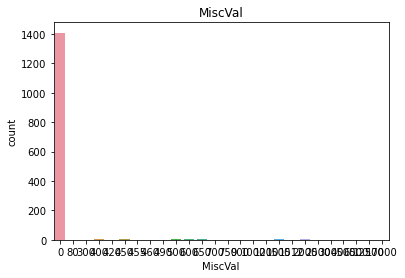

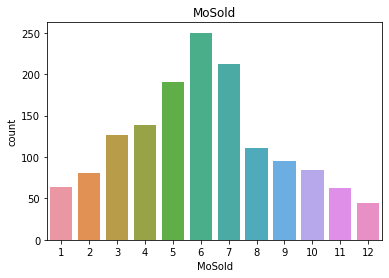

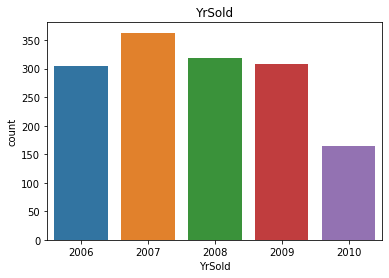

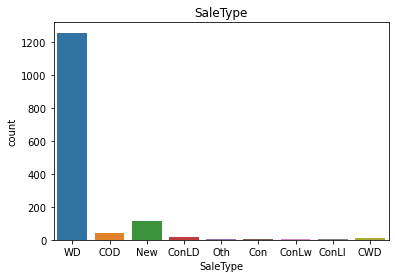

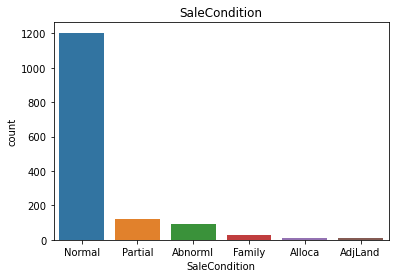

In [7]:
#Plotting graph for each column in test dataset
cols=['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities',
      'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
      'YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual',
      'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
      'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
      'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
      'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
num = test[cols]
for i in num.columns:
    sns.countplot(x = i, data = test)
    plt.title(i)
    plt.show()

In [8]:
# Concatinating test & train features into one df excluding the target ie,SalePrice
train_features = train.drop(['SalePrice'], axis=1)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [9]:
features.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

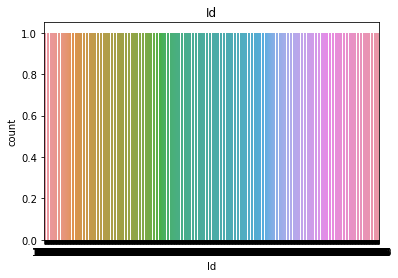

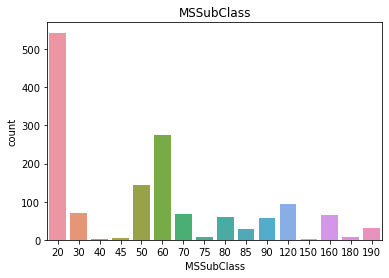

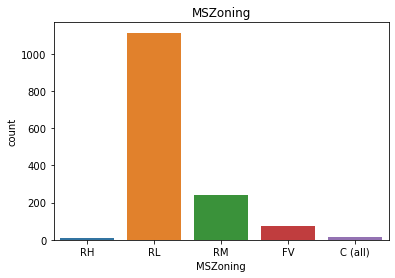

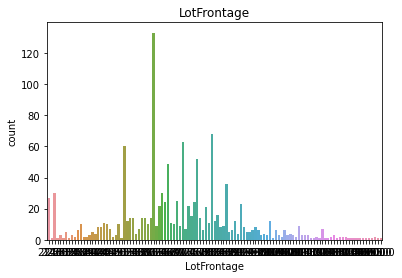

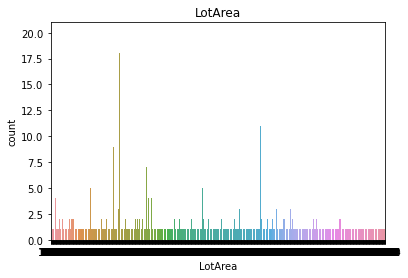

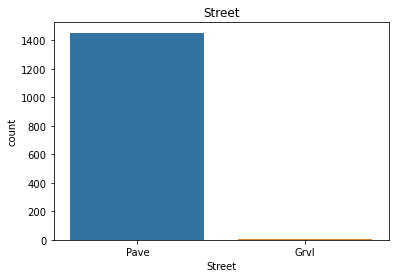

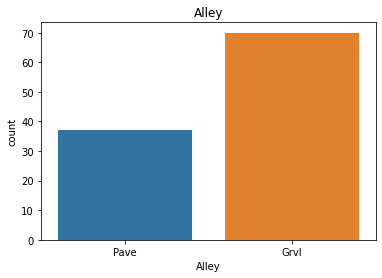

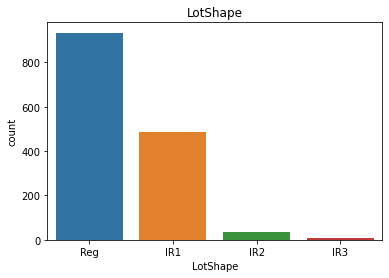

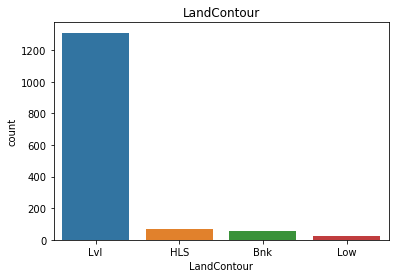

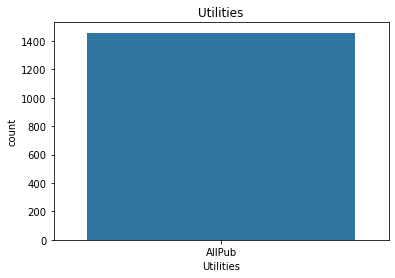

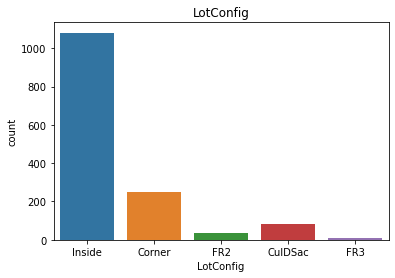

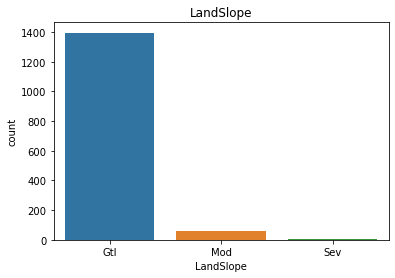

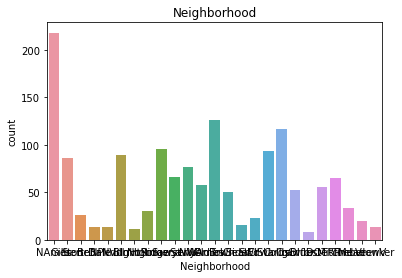

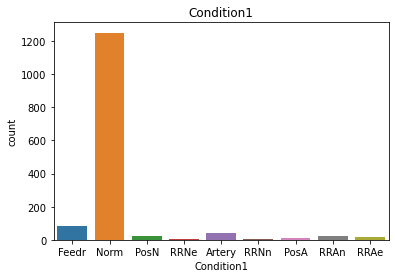

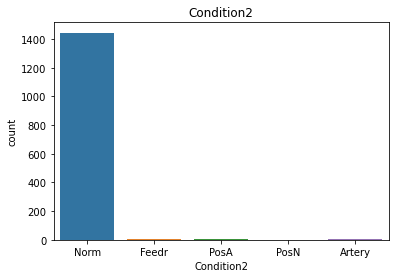

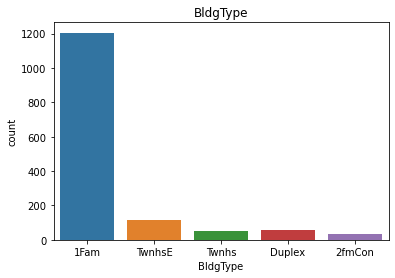

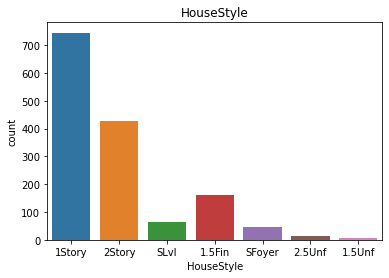

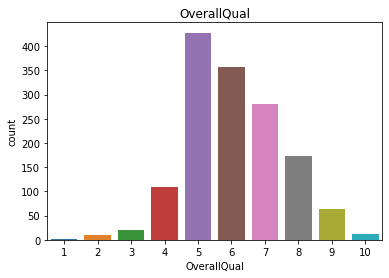

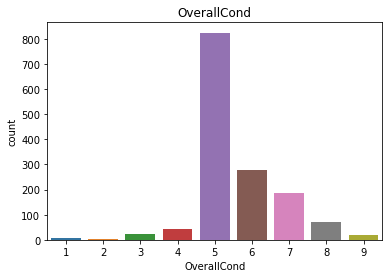

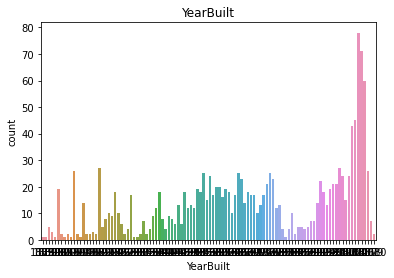

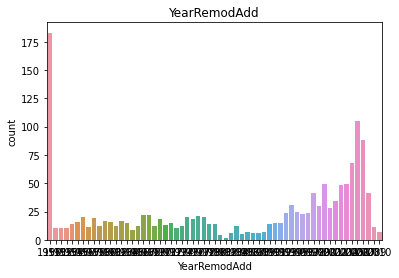

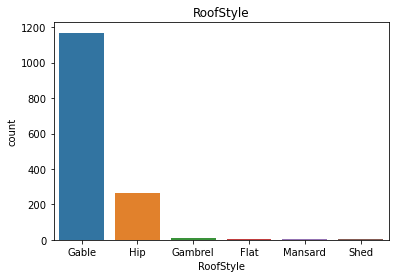

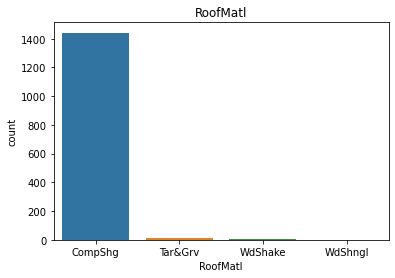

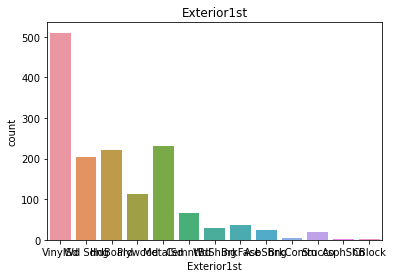

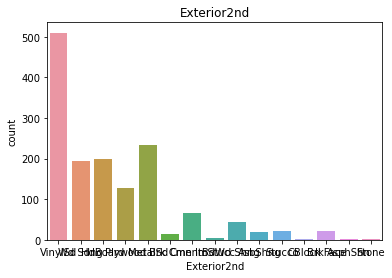

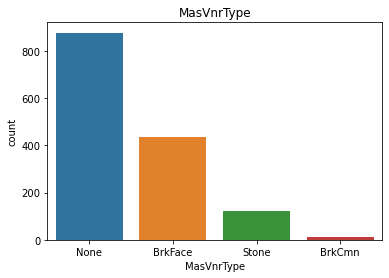

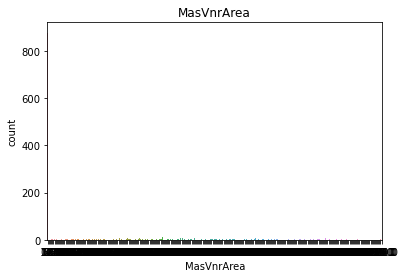

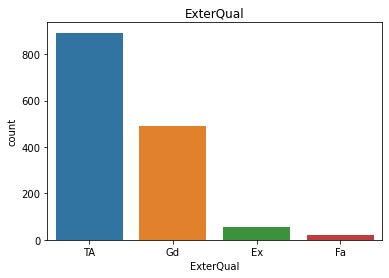

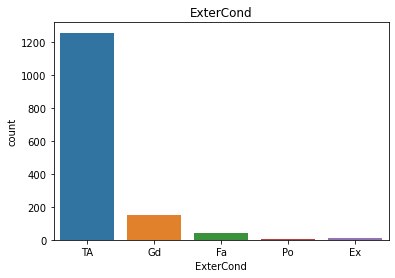

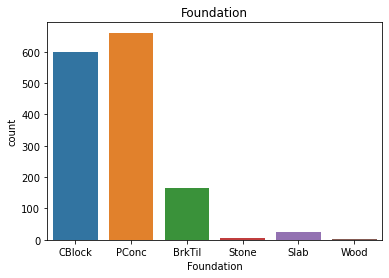

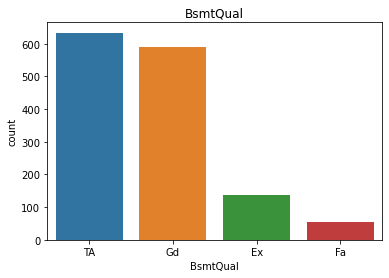

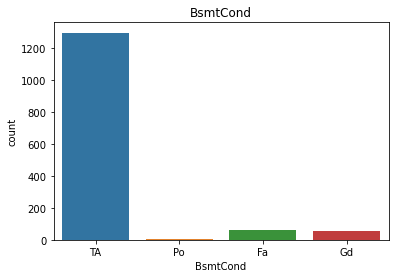

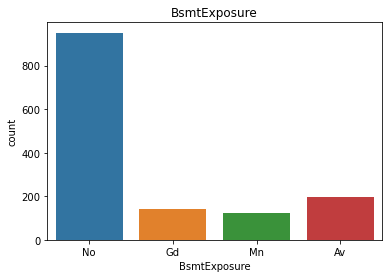

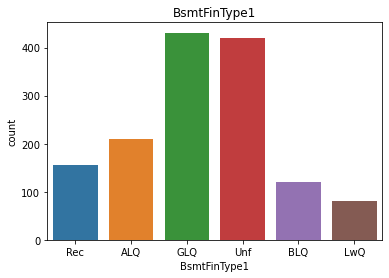

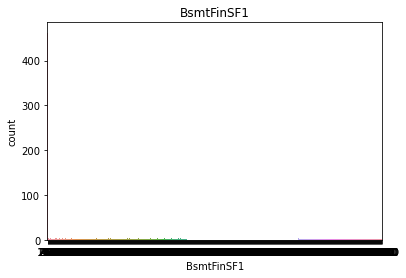

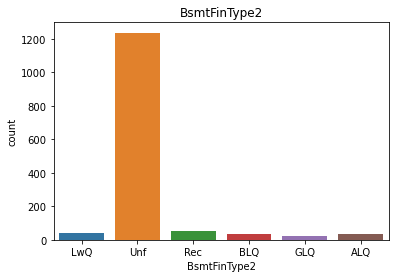

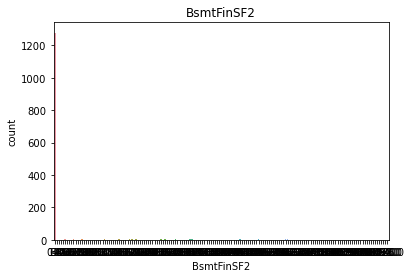

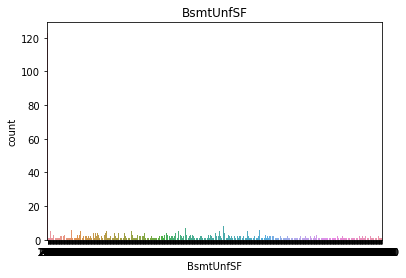

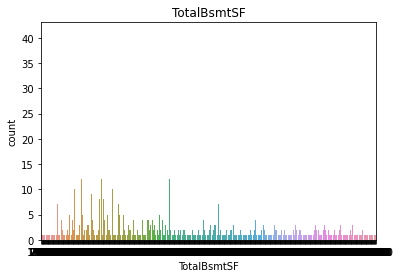

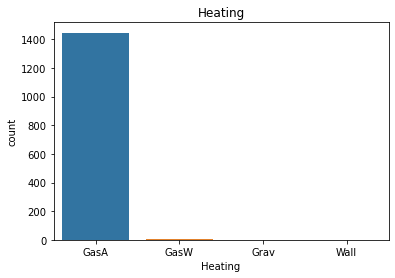

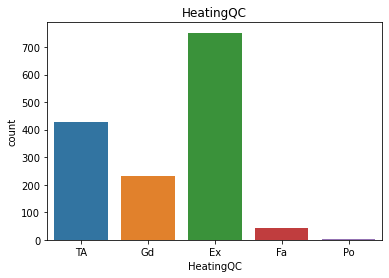

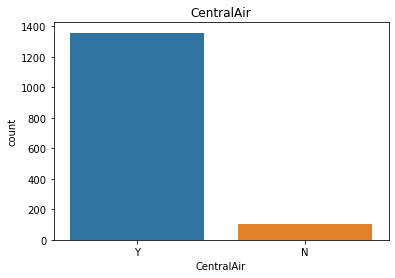

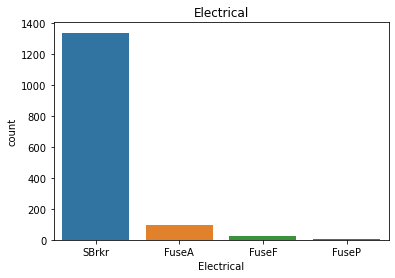

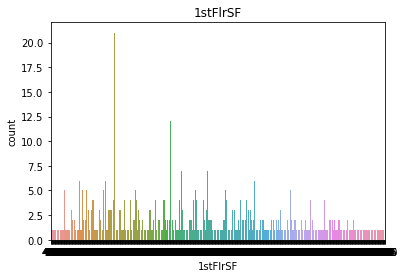

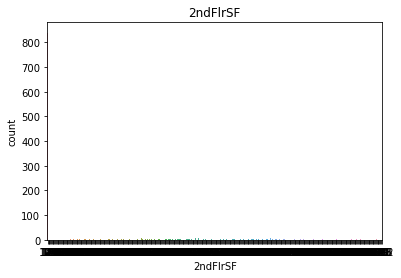

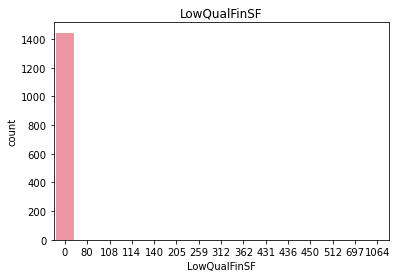

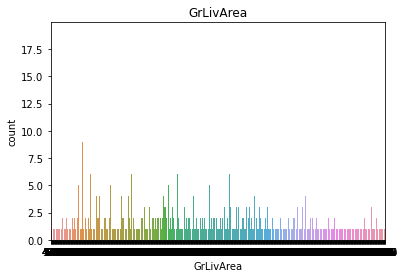

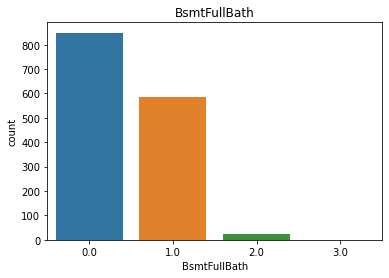

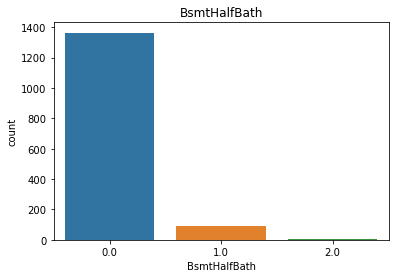

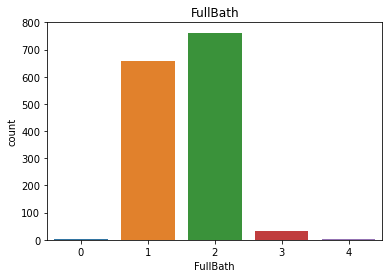

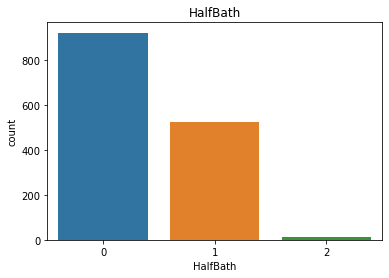

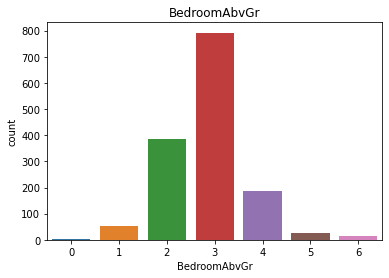

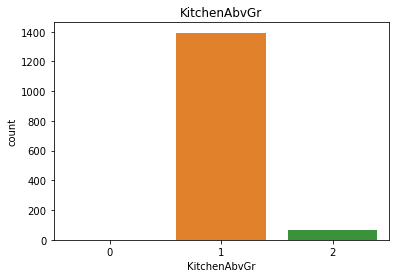

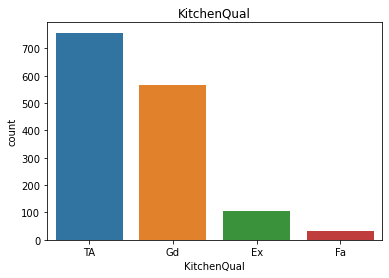

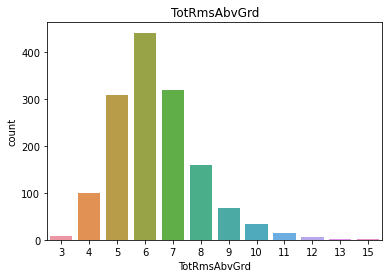

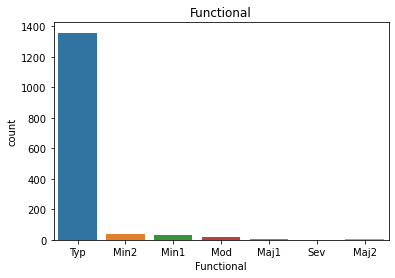

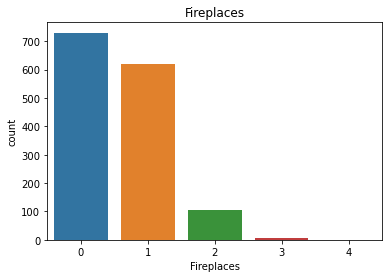

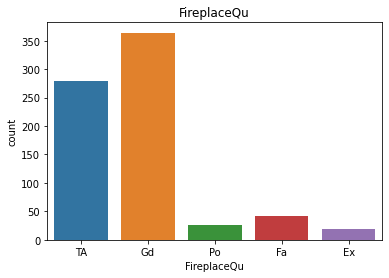

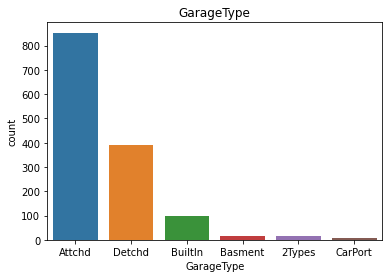

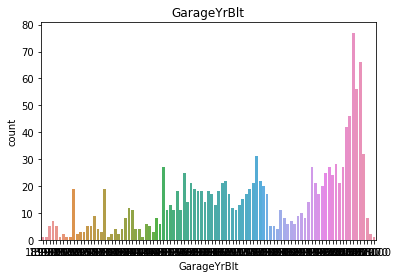

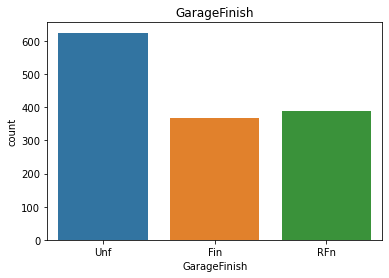

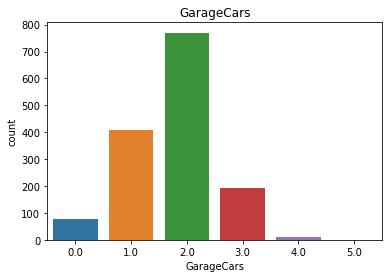

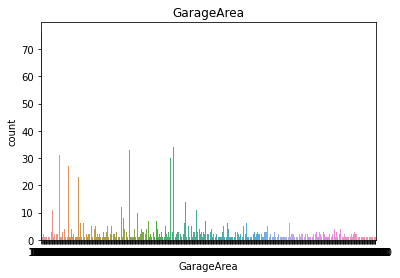

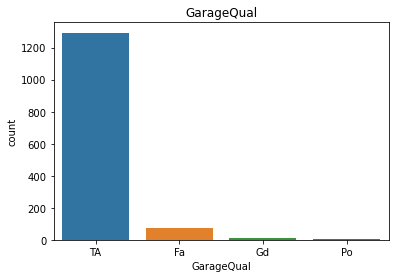

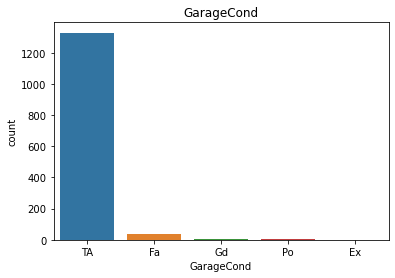

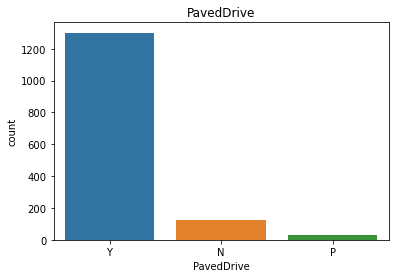

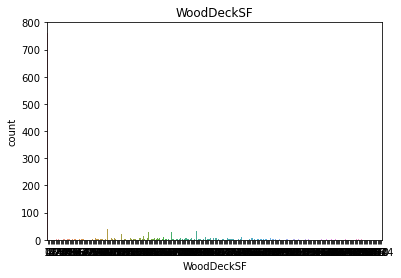

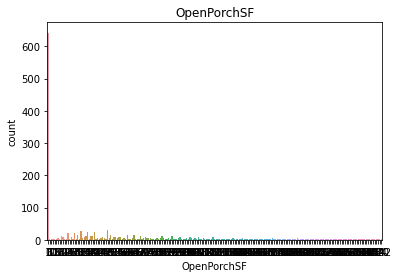

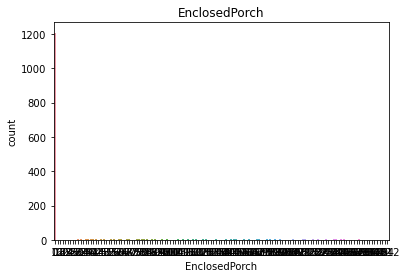

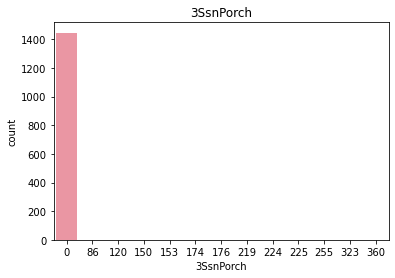

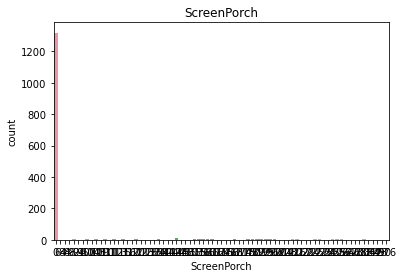

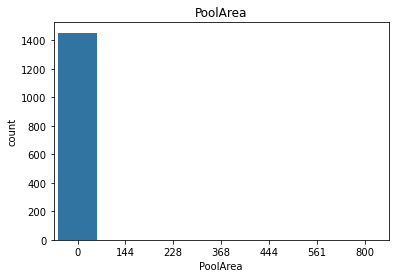

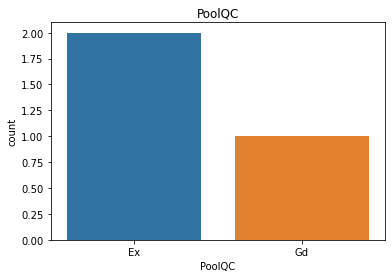

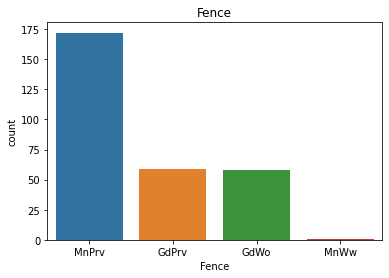

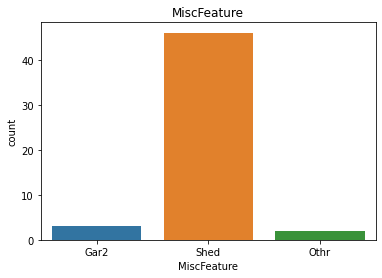

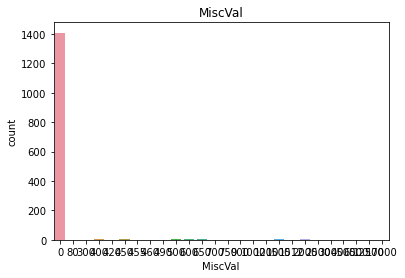

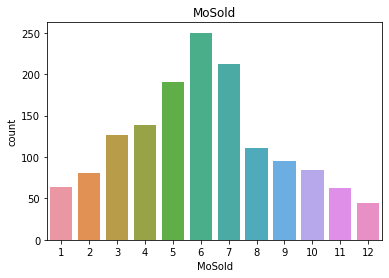

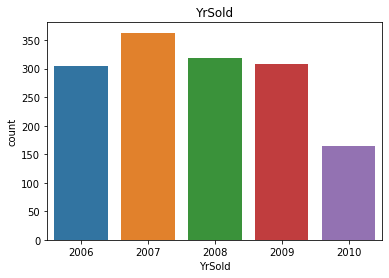

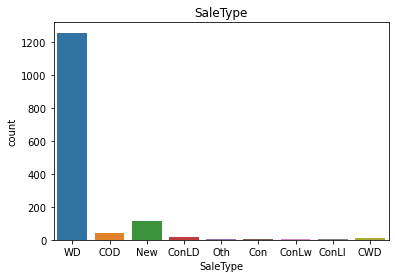

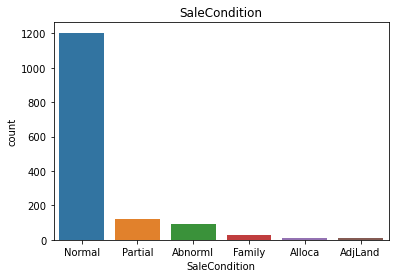

In [10]:
#Plotting graph for each column in features dataset
cols=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
      'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
      'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
      'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
      'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
      'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
      'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
num = test[cols]
for i in num.columns:
    sns.countplot(x = i, data = test)
    plt.title(i)
    plt.show()

In [11]:
#Here the target is SalePrice
target = train['SalePrice']
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

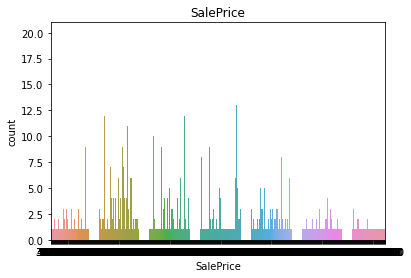

In [12]:
#Plotting a graph for target
sns.countplot(x = 'SalePrice', data = train)
plt.title('SalePrice')
plt.show()

In [13]:
# Checking for NaN , Missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns
missing_values_table(features)

,Missing Values,% of Total Values
PoolQC,2909,99.7
MiscFeature,2814,96.4
Alley,2721,93.2
Fence,2348,80.4
FireplaceQu,1420,48.6
LotFrontage,486,16.6
GarageFinish,159,5.4
GarageQual,159,5.4
GarageCond,159,5.4
GarageYrBlt,159,5.4


In [14]:
#Since 5 columns have more than 40% of NaN values , we drop them
features = features.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

In [15]:
#Changing the dtyype to str 
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

In [16]:
#Checking the most type of value used 
print(features['Functional'].value_counts(dropna=False))
print(features['Electrical'].value_counts(dropna=False))
print(features['KitchenQual'].value_counts(dropna=False))

print(features['Exterior1st'].value_counts(dropna=False))
print(features['Exterior2nd'].value_counts(dropna=False))
print(features['SaleType'].value_counts(dropna=False))

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64
TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64
WD       2525
New       239
COD        87
ConLD      26
CWD       

In [17]:
#Filling the columns with suitable values from the above output
features['Functional'] = features['Functional'].fillna('Typ') 
features['Electrical'] = features['Electrical'].fillna("SBrkr") 
features['KitchenQual'] = features['KitchenQual'].fillna("TA") 
#Filling using MODE ie, most common value 
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0]) 
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

In [18]:
#Filling missing values by 0 and None for Garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')

#Same with Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')
    
# Fill the remaining columns as None whose dtype is object
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [19]:
missing_values_table(features)

,Missing Values,% of Total Values
LotFrontage,486,16.6
MasVnrArea,23,0.8
BsmtFullBath,2,0.1
BsmtHalfBath,2,0.1
BsmtFinSF1,1,0.0
BsmtFinSF2,1,0.0
BsmtUnfSF,1,0.0
TotalBsmtSF,1,0.0


In [20]:
# Filling missing values in numerical cols with 0
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))


In [21]:
missing_values_table(features)

,Missing Values,% of Total Values


In [22]:
#Here we can see that their are no missing values available 

In [23]:
features

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [24]:
print(features['Utilities'].value_counts(dropna=False))
print(features['Street'].value_counts(dropna=False))

AllPub    2916
None         2
NoSeWa       1
Name: Utilities, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64


In [25]:
print(features['Utilities'].value_counts(dropna=False))
print(features['Street'].value_counts(dropna=False))

AllPub    2916
None         2
NoSeWa       1
Name: Utilities, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64


In [26]:
#Dropping few columns
features = features.drop(['Utilities', 'Street', 'MasVnrType'], axis=1)

In [27]:
#  Get_dummies converts Categorical data to numerical, as models don't work with Text data
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

(2919, 303)

In [28]:
y = target
X = final_features
X.shape, y.shape

((2919, 303), (1460,))

In [29]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]
X.shape, y.shape, X_sub.shape

((1460, 303), (1460,), (1459, 303))

In [30]:
final_features.iloc[[30,88,462, 631, 1322]]

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
30,31,50.0,8500,4,4,1920,1950,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
88,89,105.0,8470,3,2,1915,1982,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
462,463,60.0,8281,5,5,1965,1965,0.0,553.0,311.0,...,0,0,0,1,0,0,0,0,1,0
631,632,34.0,4590,8,5,2006,2006,108.0,24.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1322,1323,107.0,10186,7,5,1992,1992,0.0,674.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
# Removing outliers.
# Can be seen by plotting them in a graph.

outliers = [30, 88, 462, 631, 1322]

# From RandomForest:
# outliers = [30, 39, 58, 88, 108, 307, 375, 462, 520, 523, 533, 631, 635, 636, 705, 769, 778, 828, 954, 1179, 1218, 1219, 1298, 1322, 1337]

X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [32]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)
X_sub = X_sub.drop(overfit, axis=1)
overfit

['MSSubClass_150', 'MSZoning_None']

In [33]:
X.shape, y.shape, X_sub.shape

((1455, 301), (1455,), (1459, 301))

In [34]:
#Performing Random Forest
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

rfr = RandomForestRegressor(n_estimators=50, random_state=12)

In [35]:
#Performing Random Forest
rfr.fit(X, y)
print('Random Forest: {}'.format(rfr.score(X, y)))

Random Forest: 0.9787770760999258


In [36]:
#Performing Linear Regression
regressor = LinearRegression()
regressor.fit(X,y)
print('Regressor: {}'.format(regressor.score(X, y)))

Regressor: 0.9318832272905929


In [37]:
#Prediction
y_pred = regressor.predict(X) 
y_pred

array([203104.90379915, 207870.12587775, 208870.15804607, ...,
       282705.23824513, 139093.59553759, 148690.95249129])

In [38]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1455, dtype: int64

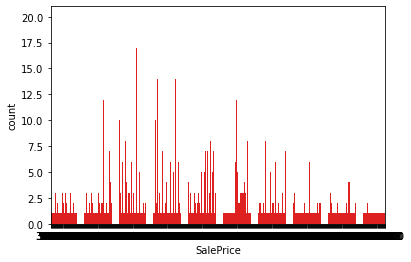

In [39]:
sns.countplot(y, color='red') 
plt.show() 

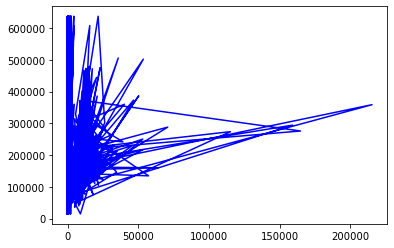

In [40]:
plt.plot(X, regressor.predict(X), color='blue') # plotting the regression line
plt.show()

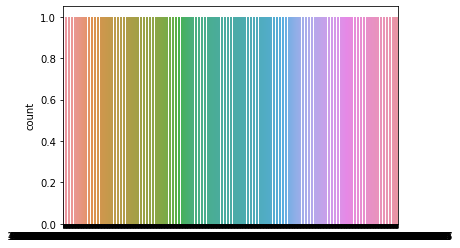

In [41]:
sns.countplot(y_pred)
plt.show()

In [42]:
#Performing Logistic Regression
log_reg = LogisticRegression()

#fit the model to the training data
log_reg.fit(X, y)

print('log_reg: {}'.format(log_reg.score(X, y)))

log_reg: 0.05910652920962199


In [43]:
#Performing Ensembly Modelling for the dataset
#Prediction
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model2.fit(X,y)
model3.fit(X,y)

pred2=model2.predict_proba(X)
pred3=model3.predict_proba(X)

finalpred=(pred2+pred3)/2
finalpred

array([[1.48977239e-04, 2.19924317e-04, 6.63472819e-05, ...,
        4.74044852e-08, 3.53829641e-04, 4.78311924e-05],
       [3.21006459e-04, 3.49229187e-04, 4.63624910e-05, ...,
        3.92628834e-08, 1.01444477e-04, 2.82708463e-05],
       [3.87669189e-04, 5.32596165e-04, 6.90181067e-05, ...,
        8.94070022e-07, 3.82090941e-04, 3.07523644e-04],
       ...,
       [6.42525959e-06, 1.02415823e-05, 1.48339069e-05, ...,
        9.29574018e-10, 9.33007504e-05, 4.40803876e-06],
       [1.99862841e-04, 6.39885630e-04, 7.96981098e-05, ...,
        1.88079423e-08, 9.78612215e-06, 2.57622740e-06],
       [3.00925761e-04, 5.16741712e-04, 8.80757531e-05, ...,
        2.83924242e-08, 8.53190300e-05, 1.13821202e-05]])

In [44]:
#Performing Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [45]:
predict = model.predict(X)
predict = list(predict)
type(predict)

list

In [46]:
y = list(y)
df1 = pd.DataFrame(y, predict)
df1

,0
208500,208500
181500,181500
223500,223500
140000,140000
250000,250000
...,...
175000,175000
210000,210000
266500,266500
142125,142125


In [47]:
accuracy_score(y, predict)

1.0

In [48]:
confusion_matrix(y, predict)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)